## OVERVIEW OF OSEMiN

In [1042]:
# def clean_column(column):
#     column_str = str(column)
#     print('Total unique itms: ' + str(df[column].nunique()))
#     print('Displaying first 10:')
#     print(df[column].unique()[0:10])
#     return column_str

# # print(check_column(date))

# check_column('date')

# # column = 'date'

# # print('Total unique itms: ' + str(df[column].nunique()))

In [1043]:
# print('Total unique itms: ' + str(df['date'].nunique()))
# print('Displaying first 10:')
# print(df['date'].unique()[0:10])

# sns.regplot(data=df, x='sqft_living', y='price')

# # try: 
# #     sns.regplot(data=df, x='date', y='price')
# # except:
# #     print('regplot did not work')
# # try: 
# #     sns.displot(data=df, x='date', y='price')
# # except:
# #     print('regplot did not work')



In [1044]:

# pip install jupyter_contrib_nbextensions

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>

<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>


> <font size=2em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS

**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  





## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:1.4em;color:red;font-size:30pt;display:inline-block;line-height:1.5em;">
DELETE THIS CELL AND EVERYTHING ABOVE FROM YOUR FINAL NOTEBOOK
</div>

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



# OBTAIN

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***


In [1045]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/kc_house_data.csv')

df.columns

#which ones have a linear relationship to price.  funciton that did two things, plot distribtuion plot of column
#as one sup plot, then one between reg column and target column, 
#if more skewed, normalize might be worth considering.

# plot show feature vs price

# plot show distribution



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# SCRUB

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [1046]:
df.head()

print(df.info())

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1047]:
df = df.set_index('id')

<AxesSubplot:>

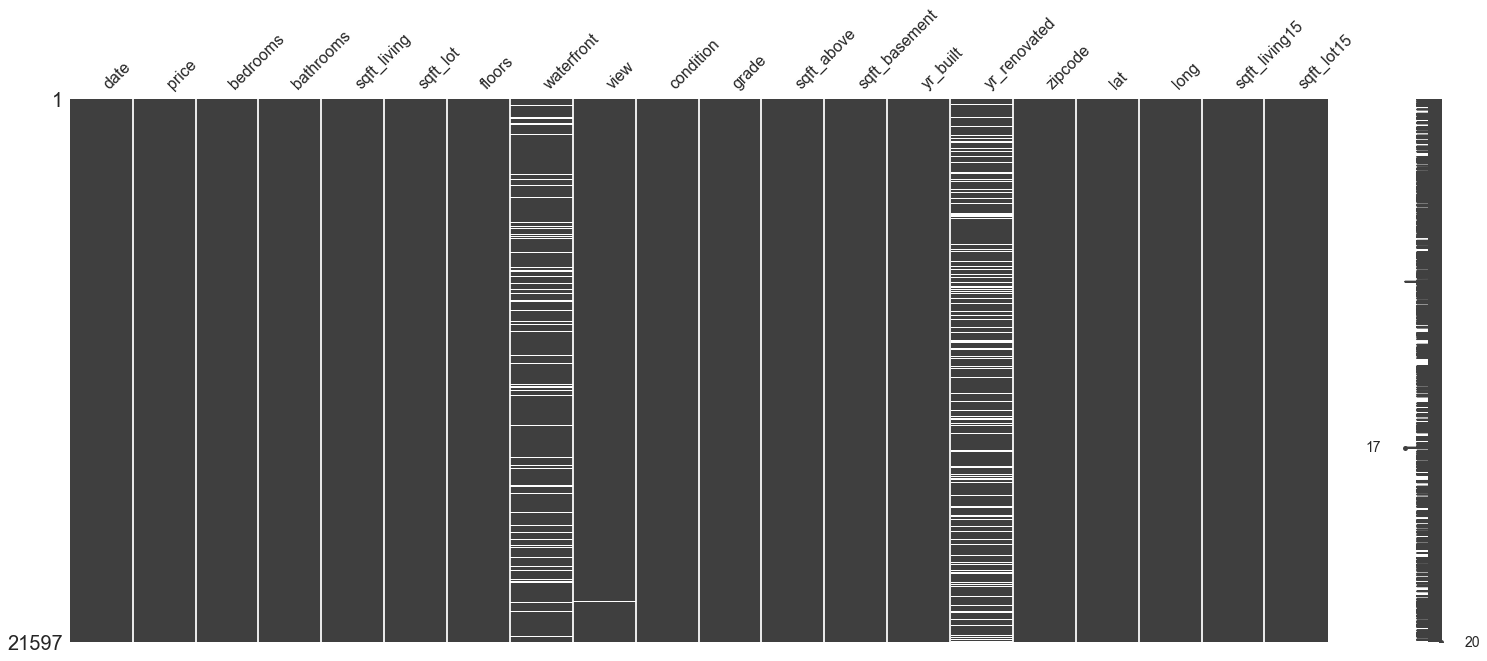

In [1048]:
import missingno as msno

msno.matrix(df)

In [1049]:
def clean_column(column, unique_count=10):
    column_str = str(column)
    print('Datatype: ' + str(df[column].dtypes))
    print('Total unique itms: ' + str(df[column].nunique()))
    print('Displaying first ' + str(unique_count) + ':')
    print(df[column].unique()[0:unique_count])
    return column_str

In [1050]:
clean_column('waterfront')

# this code assigns 0 to all na waterfronts.  will not use
# df['waterfront'] = df['waterfront'].fillna(0)
# df['waterfront'] = df['waterfront'].astype(int)

df = df[df['waterfront'].notna()]

clean_column('waterfront')

Datatype: float64
Total unique itms: 2
Displaying first 10:
[nan  0.  1.]
Datatype: float64
Total unique itms: 2
Displaying first 10:
[0. 1.]


'waterfront'

In [1051]:
clean_column('view')

df['view'] = df['view'].fillna(0)
df['view'] = df['view'].astype(int)

clean_column('view')

Datatype: float64
Total unique itms: 5
Displaying first 10:
[ 0. nan  3.  4.  2.  1.]
Datatype: int32
Total unique itms: 5
Displaying first 10:
[0 3 4 2 1]


'view'

In [1052]:
clean_column('yr_renovated', unique_count=100)

Datatype: float64
Total unique itms: 70
Displaying first 100:
[1991.   nan    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1945.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 2008. 2012. 1968. 1963. 1951.
 1962. 1953. 1993. 1955. 1996. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1965. 1967. 1934. 1972. 1944. 1958. 1974.]


'yr_renovated'

We will first remove rows with nan values from the dataset.

In [1053]:
df = df[df['yr_renovated'].notna()]

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15809 non-null  object 
 1   price          15809 non-null  float64
 2   bedrooms       15809 non-null  int64  
 3   bathrooms      15809 non-null  float64
 4   sqft_living    15809 non-null  int64  
 5   sqft_lot       15809 non-null  int64  
 6   floors         15809 non-null  float64
 7   waterfront     15809 non-null  float64
 8   view           15809 non-null  int32  
 9   condition      15809 non-null  int64  
 10  grade          15809 non-null  int64  
 11  sqft_above     15809 non-null  int64  
 12  sqft_basement  15809 non-null  object 
 13  yr_built       15809 non-null  int64  
 14  yr_renovated   15809 non-null  float64
 15  zipcode        15809 non-null  int64  
 16  lat            15809 non-null  float64
 17  long           15809 non-null  float

In [1054]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [1055]:
ren_df = df[df['yr_renovated'] != 0]

not_ren_df = df[df['yr_renovated'] == 0]


In [1056]:
ren_df['price'].describe()

count       652.00
mean     762021.03
std      637336.70
min      110000.00
25%      410000.00
50%      600000.00
75%      890250.00
max     7700000.00
Name: price, dtype: float64

In [1057]:
not_ren_df['price'].describe()

count     15157.00
mean     532063.36
std      355257.77
min       82000.00
25%      320000.00
50%      449000.00
75%      633000.00
max     6890000.00
Name: price, dtype: float64

Differences are significant, will move forward with binary.

<AxesSubplot:>

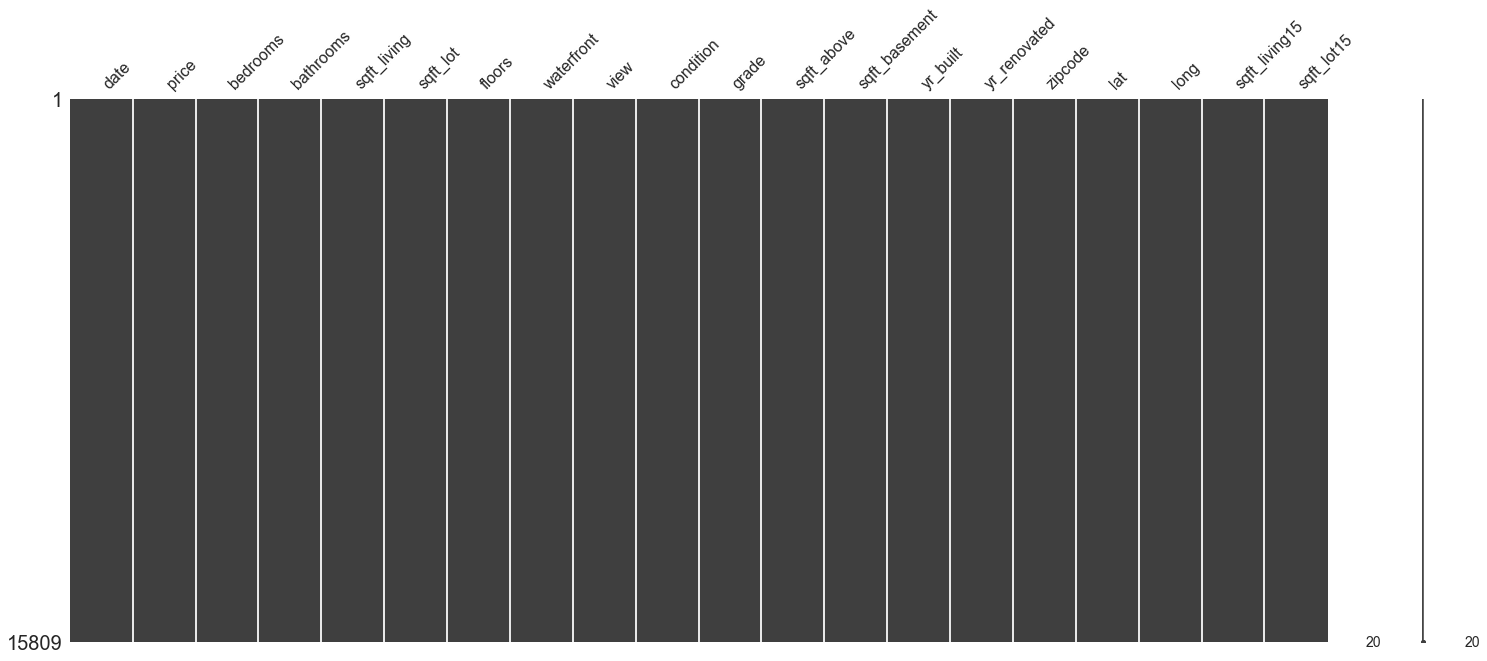

In [1058]:
msno.matrix(df)

Now we'll take a look at each column and see if anything needs correction.

## list

In [1059]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15809 non-null  object 
 1   price          15809 non-null  float64
 2   bedrooms       15809 non-null  int64  
 3   bathrooms      15809 non-null  float64
 4   sqft_living    15809 non-null  int64  
 5   sqft_lot       15809 non-null  int64  
 6   floors         15809 non-null  float64
 7   waterfront     15809 non-null  float64
 8   view           15809 non-null  int32  
 9   condition      15809 non-null  int64  
 10  grade          15809 non-null  int64  
 11  sqft_above     15809 non-null  int64  
 12  sqft_basement  15809 non-null  object 
 13  yr_built       15809 non-null  int64  
 14  yr_renovated   15809 non-null  float64
 15  zipcode        15809 non-null  int64  
 16  lat            15809 non-null  float64
 17  long           15809 non-null  float

In [1060]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
7237550310,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,0.00,0,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819


In [1061]:
def clean_column(column, unique_count=10):
    column_str = str(column)
    print('Datatype: ' + str(df[column].dtypes))
    print('Total unique itms: ' + str(df[column].nunique()))
    print('Displaying first ' + str(unique_count) + ':')
    print(df[column].unique()[0:unique_count])
    print(f"Minimum value: {df[column].min()}.  Maximum value: {df[column].max()}")
    print(df[column].describe())
    return column_str

def regplot(column):
    return sns.regplot(data=df, x=column, y='price')
    
def hist(column):
    hist = df[column].hist()
    return plt.show()

def displot(column):
    return sns.displot(data=df, x=column, y='price')

## Date

In [1062]:
clean_column('date')

df['bedrooms'].describe()

Datatype: object
Total unique itms: 370
Displaying first 10:
['12/9/2014' '2/18/2015' '5/12/2014' '6/27/2014' '1/15/2015' '4/15/2015'
 '3/12/2015' '5/27/2014' '10/7/2014' '1/24/2015']
Minimum value: 1/10/2015.  Maximum value: 9/9/2014
count         15809
unique          370
top       6/25/2014
freq            103
Name: date, dtype: object


count   15809.00
mean        3.38
std         0.94
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64

In [1063]:
df['date'] = df['date'].apply(pd.to_datetime)


<AxesSubplot:>

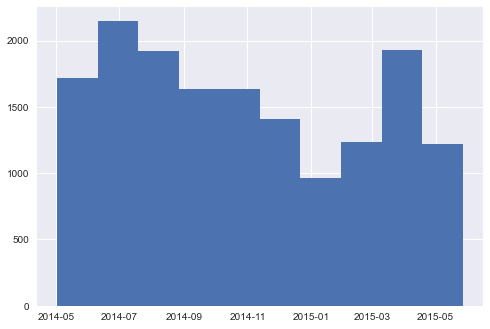

In [1064]:
df['date'].hist()

## Bedrooms

In [1065]:
clean_column('bedrooms', unique_count=20)

Datatype: int64
Total unique itms: 12
Displaying first 20:
[ 3  4  2  5  1  6  7  8  9 11 10 33]
Minimum value: 1.  Maximum value: 33
count   15809.00
mean        3.38
std         0.94
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64


'bedrooms'

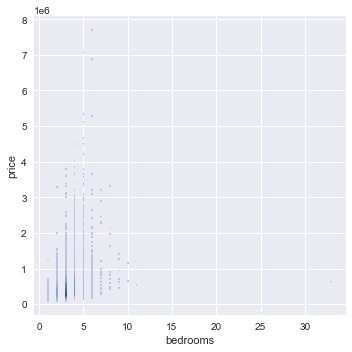

In [1066]:
displot('bedrooms')

In [1067]:
df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0.00,0,5,7,1040,580.0,1947,0.00,98103,47.69,-122.33,1330,4700


Based on other stats, we assume the one entry with 33 bedrooms to actually be 3 bedrooms.  Correcting below.

In [1068]:
df['bedrooms'] = df['bedrooms'].replace([33],3)

df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [1069]:
df.loc[df['bedrooms'] == 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1773100755,2014-08-21,520000.00,11,3.00,3000,4960,2.00,0.00,0,3,7,2400,600.0,1918,1999.00,98106,47.56,-122.36,1420,4960


The 11 bedroom house also seems unlikely based on square footage.  Googling the ID '1773100755' revelas it to be a 4 bedroom house.

In [1070]:
df['bedrooms'] = df['bedrooms'].replace([11],4)

df.loc[df['bedrooms'] == 11]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [1071]:
df.loc[df['bedrooms'] == 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
627300145,2014-08-14,1150000.00,10,5.25,4590,10920,1.00,0.00,2,3,9,2500,2090.0,2008,0.00,98004,47.59,-122.11,2730,10400
5566100170,2014-10-29,650000.00,10,2.00,3610,11914,2.00,0.00,0,4,7,3010,600.0,1958,0.00,98006,47.57,-122.17,2040,11914
8812401450,2014-12-29,660000.00,10,3.00,2920,3745,2.00,0.00,0,4,7,1860,1060.0,1913,0.00,98105,47.66,-122.32,1810,3745


Even though two of the 10 bedroom houses seem unlikely, a quick google shows that they are recorded as 9 bedroom houses on zillow.  We will assume these entries were accurate at the time, and will not change.

## Bathrooms

In [1072]:
clean_column('bathrooms', unique_count=29)

Datatype: float64
Total unique itms: 27
Displaying first 29:
[2.25 3.   2.   4.5  1.5  1.   2.5  1.75 2.75 3.25 4.   3.5  0.75 5.
 4.25 3.75 1.25 5.25 6.   4.75 0.5  5.5  5.75 8.   6.75 7.5  7.75]
Minimum value: 0.5.  Maximum value: 8.0
count   15809.00
mean        2.12
std         0.77
min         0.50
25%         1.75
50%         2.25
75%         2.50
max         8.00
Name: bathrooms, dtype: float64


'bathrooms'

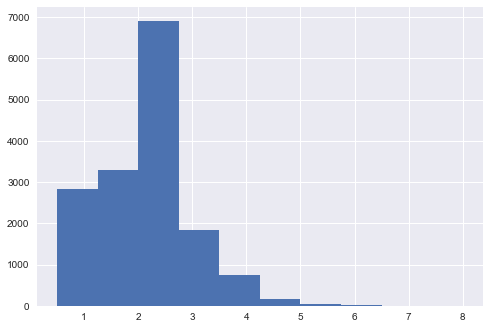

In [1073]:
hist('bathrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

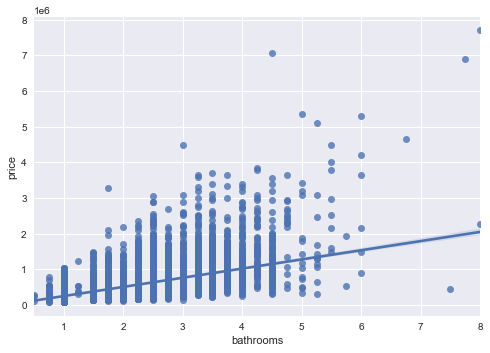

In [1074]:
regplot('bathrooms')

## Squarefoot - Living

In [1075]:
clean_column('sqft_living')

Datatype: int64
Total unique itms: 913
Displaying first 10:
[2570 1960 1680 5420 1715 1060 1780 1890 1160 1370]
Minimum value: 370.  Maximum value: 13540
count   15809.00
mean     2084.96
std       919.48
min       370.00
25%      1430.00
50%      1920.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64


'sqft_living'

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

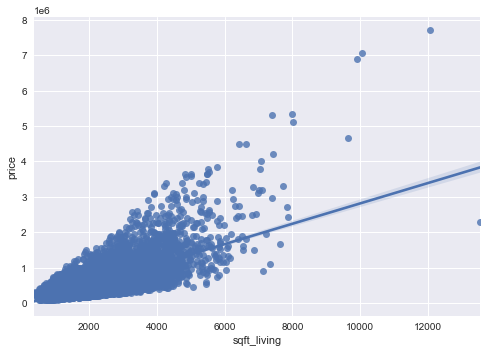

In [1076]:
regplot('sqft_living')

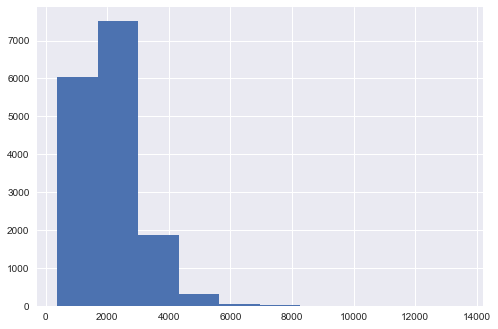

In [1077]:
hist('sqft_living')

There seem to be at least one unusual outlier for the price.  We will want to take a look at the largest values to verify the quality of the data.

In [1078]:
df.sort_values(by=['sqft_living'], ascending=False).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,2014-05-05,2280000.00,7,8.00,13540,307752,3.00,0.00,4,3,12,9410,4130.0,1999,0.00,98053,47.67,-121.99,4850,217800
6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0.00,3,4,13,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,1.00,2,3,11,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,0.00,4,3,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
1924059029,2014-06-17,4670000.00,5,6.75,9640,13068,1.00,1.00,4,3,12,4820,4820.0,1983,2009.00,98040,47.56,-122.21,3270,10454


After reviewing the one outlier, it seems to be a compound in a rural area, and the sqft seems realistic.

## Squarefoot - Lot

Datatype: int64
Total unique itms: 7939
Displaying first 10:
[  7242   5000   8080 101930   6819   9711   7470   6560   6000   9680]
Minimum value: 520.  Maximum value: 1651359
count     15809.00
mean      15298.23
std       41884.56
min         520.00
25%        5053.00
50%        7605.00
75%       10716.00
max     1651359.00
Name: sqft_lot, dtype: float64


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

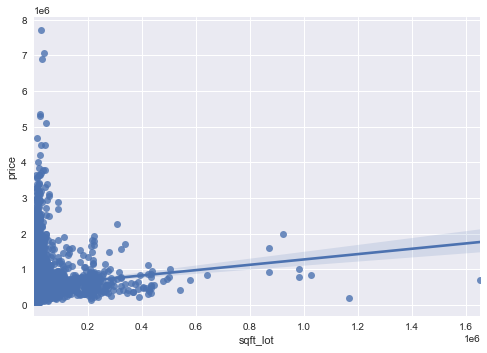

In [1079]:
clean_column('sqft_lot')
regplot('sqft_lot')

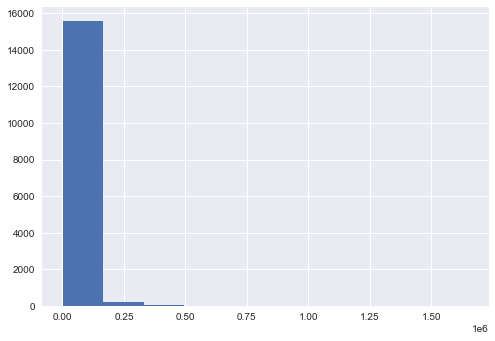

In [1080]:
hist('sqft_lot')

In [1081]:
df.sort_values(by=['sqft_lot'], ascending=False).head(5)

#outlier looks like a farm, will keep

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1020069017,2015-03-27,700000.00,4,1.00,1300,1651359,1.00,0.00,3,4,6,1300,0.0,1920,0.00,98022,47.23,-122.02,2560,425581
3326079016,2015-05-04,190000.00,2,1.00,710,1164794,1.00,0.00,0,2,5,710,0.0,1915,0.00,98014,47.69,-121.91,1680,16730
2323089009,2015-01-19,855000.00,4,3.50,4030,1024068,2.00,0.00,0,3,10,4030,0.0,2006,0.00,98045,47.46,-121.74,1830,11700
722069232,2014-09-05,998000.00,4,3.25,3770,982998,2.00,0.00,0,3,10,3770,0.0,1992,0.00,98058,47.41,-122.09,2290,37141
3626079040,2014-07-30,790000.00,2,3.00,2560,982278,1.00,0.00,0,3,8,2560,0.0,2004,0.00,98014,47.70,-121.86,1620,40946


## Floors

Datatype: float64
Total unique itms: 6
Displaying first 10:
[2.  1.  1.5 3.  2.5 3.5]
Minimum value: 1.0.  Maximum value: 3.5
count   15809.00
mean        1.49
std         0.54
min         1.00
25%         1.00
50%         1.50
75%         2.00
max         3.50
Name: floors, dtype: float64


<AxesSubplot:xlabel='floors', ylabel='price'>

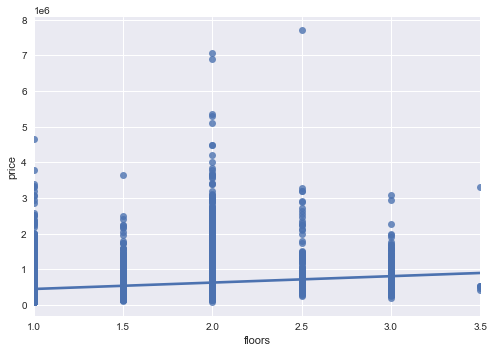

In [1082]:
clean_column('floors')

regplot('floors')

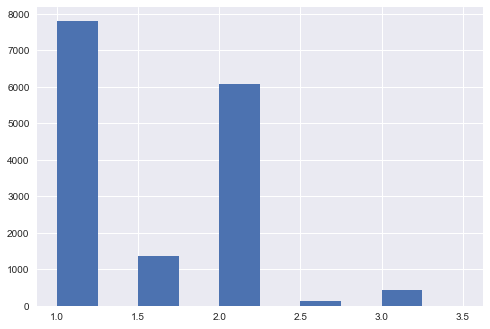

In [1083]:
hist('floors')

## Waterfront

Datatype: float64
Total unique itms: 2
Displaying first 10:
[0. 1.]
Minimum value: 0.0.  Maximum value: 1.0
count   15809.00
mean        0.01
std         0.09
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: waterfront, dtype: float64


<AxesSubplot:xlabel='waterfront', ylabel='price'>

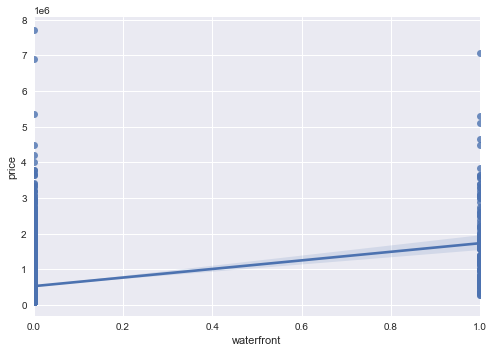

In [1084]:
clean_column('waterfront')

regplot('waterfront')

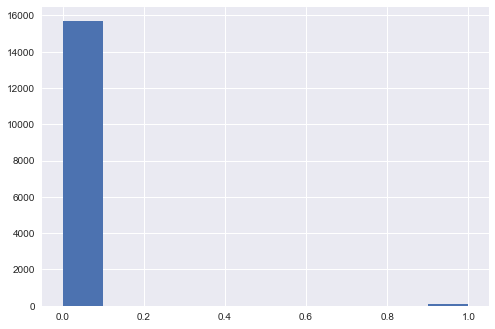

In [1085]:
hist('waterfront')

## View

Datatype: int32
Total unique itms: 5
Displaying first 10:
[0 3 4 2 1]
Minimum value: 0.  Maximum value: 4
count   15809.00
mean        0.23
std         0.76
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: view, dtype: float64


<AxesSubplot:xlabel='view', ylabel='price'>

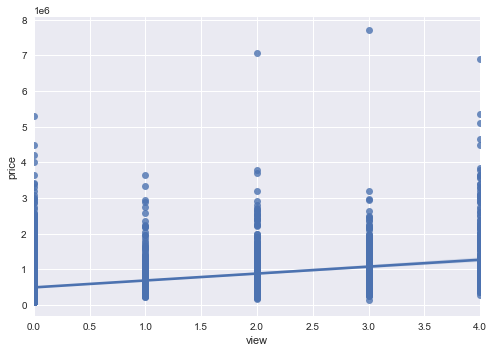

In [1086]:
clean_column('view')

regplot('view')

## condition

Datatype: int64
Total unique itms: 5
Displaying first 10:
[3 5 4 1 2]
Minimum value: 1.  Maximum value: 5
count   15809.00
mean        3.41
std         0.65
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: condition, dtype: float64


<AxesSubplot:xlabel='condition', ylabel='price'>

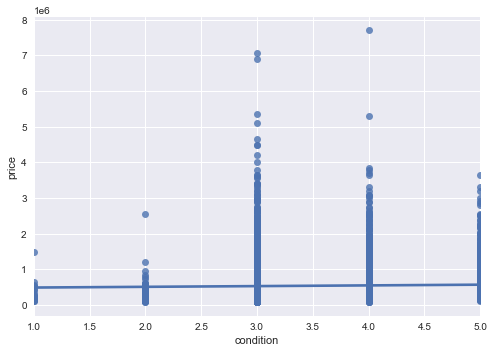

In [1087]:
clean_column('condition')

regplot('condition')

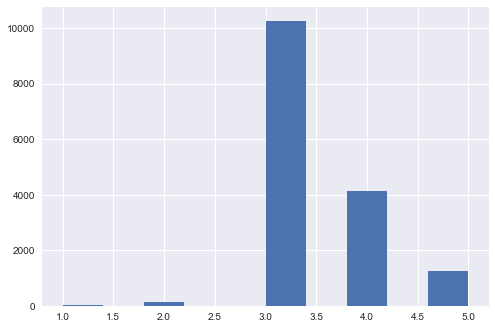

In [1088]:
hist('condition')

## grade

Datatype: int64
Total unique itms: 11
Displaying first 10:
[ 7  8 11  9  6  5 10 12  4  3]
Minimum value: 3.  Maximum value: 13
count   15809.00
mean        7.66
std         1.17
min         3.00
25%         7.00
50%         7.00
75%         8.00
max        13.00
Name: grade, dtype: float64


<AxesSubplot:xlabel='grade', ylabel='price'>

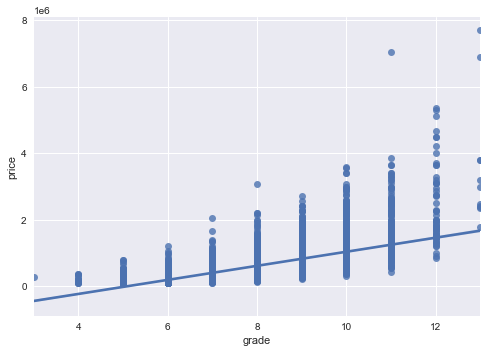

In [1089]:
clean_column('grade')

regplot('grade')

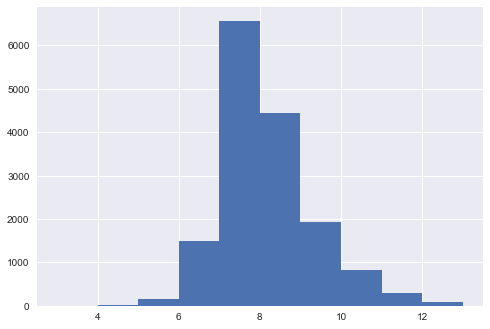

In [1090]:
hist('grade')

In [1091]:
df[df['grade'] == 13]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9831200500,2015-03-04,2480000.00,5,3.75,6810,7500,2.50,0.00,0,3,13,6110,700.0,1922,0.00,98102,47.63,-122.32,2660,7500
7237501190,2014-10-10,1780000.00,4,3.25,4890,13402,2.00,0.00,0,3,13,4890,0.0,2004,0.00,98059,47.53,-122.13,5790,13539
1725059316,2014-11-20,2390000.00,4,4.00,6330,13296,2.00,0.00,2,3,13,4900,1430.0,2000,0.00,98033,47.65,-122.20,2200,9196
853200010,2014-07-01,3800000.00,5,5.50,7050,42840,1.00,0.00,2,4,13,4320,2730.0,1978,0.00,98004,47.62,-122.22,5070,20570
6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0.00,3,4,13,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
1068000375,2014-09-23,3200000.00,6,5.00,7100,18200,2.50,0.00,0,3,13,5240,1860.0,1933,2002.00,98199,47.64,-122.41,3130,6477
9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,0.00,4,3,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
3303850390,2014-12-12,2980000.00,5,5.50,7400,18898,2.00,0.00,3,3,13,6290,1110.0,2001,0.00,98006,47.54,-122.11,6110,26442
2426039123,2015-01-30,2420000.00,5,4.75,7880,24250,2.00,0.00,2,3,13,7880,0.0,1996,0.00,98177,47.73,-122.36,2740,10761


## sqft_above

Datatype: int64
Total unique itms: 835
Displaying first 10:
[2170 1050 1680 3890 1715 1060 1890  860 1370 1810]
Minimum value: 370.  Maximum value: 9410
count   15809.00
mean     1792.75
std       828.48
min       370.00
25%      1200.00
50%      1570.00
75%      2220.00
max      9410.00
Name: sqft_above, dtype: float64


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

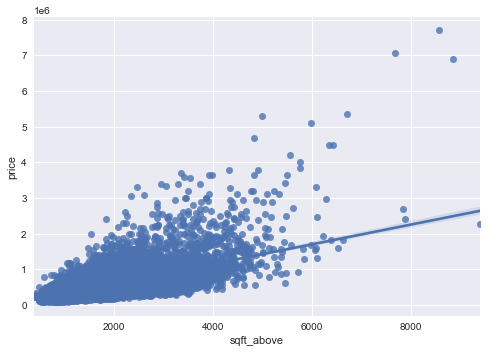

In [1092]:
clean_column('sqft_above')

regplot('sqft_above')

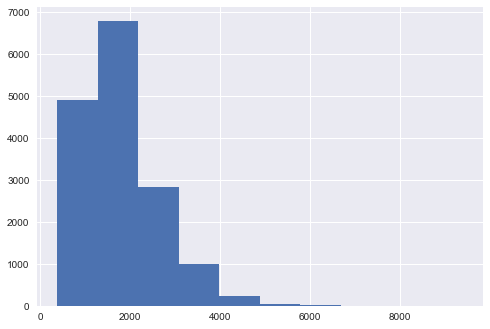

In [1093]:
hist('sqft_above')

## sqft_basement

In [1094]:
clean_column('sqft_basement')


Datatype: object
Total unique itms: 285
Displaying first 10:
['400.0' '910.0' '0.0' '1530.0' '?' '730.0' '300.0' '970.0' '760.0'
 '720.0']
Minimum value: 0.0.  Maximum value: ?
count     15809
unique      285
top         0.0
freq       9384
Name: sqft_basement, dtype: object


'sqft_basement'

It seems there are some errors with question marks.  Let's take a look.

In [1095]:
df[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
16000397,2014-12-05,189000.00,2,1.00,1200,9850,1.00,0.00,0,4,7,1200,?,1921,0.00,98002,47.31,-122.21,1060,5095
7203220400,2014-07-07,861990.00,5,2.75,3595,5639,2.00,0.00,0,3,9,3595,?,2014,0.00,98053,47.68,-122.02,3625,5639
1531000030,2015-03-23,720000.00,4,2.50,3450,39683,2.00,0.00,0,3,10,3450,?,2002,0.00,98010,47.34,-122.03,3350,39750
2525310310,2014-09-16,272500.00,3,1.75,1540,12600,1.00,0.00,0,4,7,1160,?,1980,0.00,98038,47.36,-122.03,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278600680,2014-06-27,235000.00,1,1.50,1170,1456,2.00,0.00,0,3,8,1070,?,2007,0.00,98126,47.55,-122.37,1360,1730
2309710150,2014-08-04,325000.00,4,3.25,2800,5291,2.00,0.00,0,3,7,2800,?,2011,0.00,98022,47.19,-121.98,2380,5291
9521100301,2014-05-07,339950.00,2,1.00,820,681,3.00,0.00,0,3,8,820,?,2006,0.00,98103,47.66,-122.35,820,1156


It might be best to go ahead and make a "True" and "False" boolean column for 'has_basement.'  We will also change all '?' values to zero (0) and conver the values into floats.

In [1096]:
# df['sqft_basement'] = df['sqft_basement'].replace(['?'],0.0)

df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

df.loc[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [1097]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [1098]:
# run this line if need to rerun and delete 'has_basement'
# del df['has_basement']

has_basement = np.where(df['sqft_basement'] > 0, 1, 0)

df.insert (12, 'has_basement', has_basement)

df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,...,2170,1,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,...,1050,1,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,...,1680,0,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0,3,...,3890,1,1530.00,2001,0.00,98053,47.66,-122.00,4760,101930
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,...,1715,0,0.00,1995,0.00,98003,47.31,-122.33,2238,6819


## Year Built

Datatype: int64
Total unique itms: 116
Displaying first 10:
[1951 1965 1987 2001 1995 1963 1960 2003 1942 1977]
Minimum value: 1900.  Maximum value: 2015
count   15809.00
mean     1971.11
std        29.33
min      1900.00
25%      1952.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64


<AxesSubplot:xlabel='yr_built', ylabel='price'>

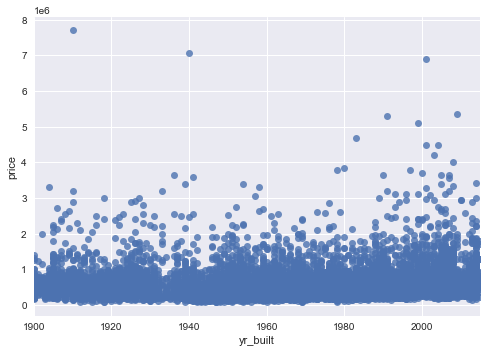

In [1099]:
clean_column('yr_built')

regplot('yr_built')

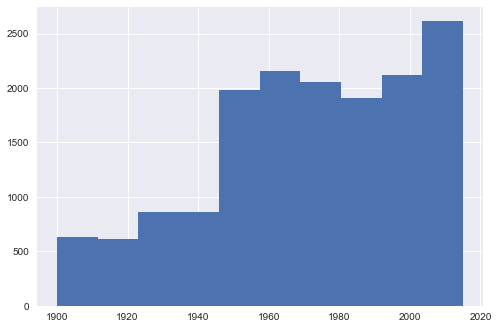

In [1100]:
hist('yr_built')

## yr_renovated

Datatype: float64
Total unique itms: 70
Displaying first 10:
[1991.    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003.]
Minimum value: 0.0.  Maximum value: 2015.0
count   15809.00
mean       82.32
std       396.94
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

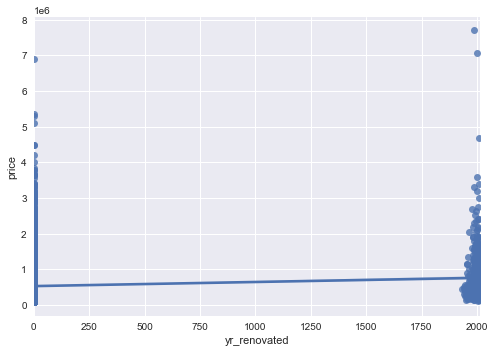

In [1101]:
clean_column('yr_renovated')

regplot('yr_renovated')

Convert to binary.

In [1102]:
renovated = np.where(df['yr_renovated'] > 0, 1, 0)

df['renovated'] = renovated

del df['yr_renovated']

df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,...,2170,1,400.00,1951,98125,47.72,-122.32,1690,7639,1
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,...,1050,1,910.00,1965,98136,47.52,-122.39,1360,5000,0
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,...,1680,0,0.00,1987,98074,47.62,-122.05,1800,7503,0
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0,3,...,3890,1,1530.00,2001,98053,47.66,-122.00,4760,101930,0
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,...,1715,0,0.00,1995,98003,47.31,-122.33,2238,6819,0


In [1103]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,...,2170,1,400.00,1951,98125,47.72,-122.32,1690,7639,1
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,...,1050,1,910.00,1965,98136,47.52,-122.39,1360,5000,0
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,...,1680,0,0.00,1987,98074,47.62,-122.05,1800,7503,0
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0,3,...,3890,1,1530.00,2001,98053,47.66,-122.00,4760,101930,0
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,...,1715,0,0.00,1995,98003,47.31,-122.33,2238,6819,0


## Zipcode

In [1104]:
clean_column('zipcode')

Datatype: int64
Total unique itms: 70
Displaying first 10:
[98125 98136 98074 98053 98003 98198 98146 98038 98115 98107]
Minimum value: 98001.  Maximum value: 98199
count   15809.00
mean    98077.56
std        53.41
min     98001.00
25%     98033.00
50%     98065.00
75%     98117.00
max     98199.00
Name: zipcode, dtype: float64


'zipcode'

Zipcode should be integer for now, since there will be no decimals.  It might be worth considering conversion to string as well further in the project.

In [1105]:
df['zipcode'] = df['zipcode'].astype(int)

Datatype: int32
Total unique itms: 70
Displaying first 10:
[98125 98136 98074 98053 98003 98198 98146 98038 98115 98107]
Minimum value: 98001.  Maximum value: 98199
count   15809.00
mean    98077.56
std        53.41
min     98001.00
25%     98033.00
50%     98065.00
75%     98117.00
max     98199.00
Name: zipcode, dtype: float64


<AxesSubplot:xlabel='zipcode', ylabel='price'>

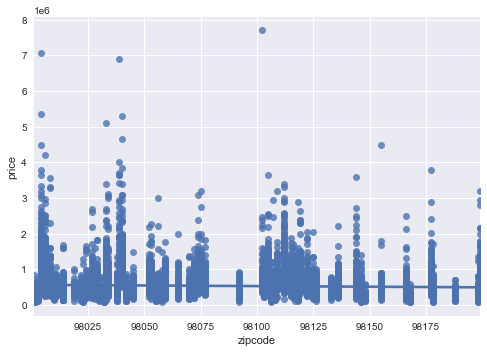

In [1106]:
clean_column('zipcode')

regplot('zipcode')

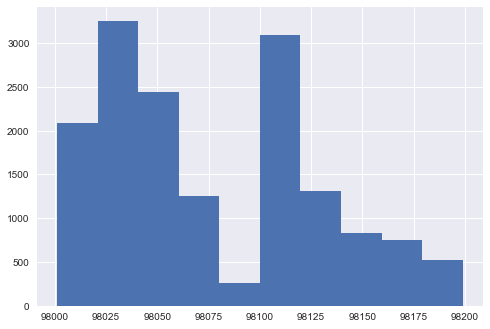

In [1107]:
hist('zipcode')

## 'sqft_living15'

The square footage of interior housing living space for the nearest 15 neighbors

Datatype: int64
Total unique itms: 694
Displaying first 10:
[1690 1360 1800 4760 2238 1650 1780 2390 1330 1370]
Minimum value: 399.  Maximum value: 6210
count   15809.00
mean     1990.39
std       684.15
min       399.00
25%      1490.00
50%      1850.00
75%      2370.00
max      6210.00
Name: sqft_living15, dtype: float64


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

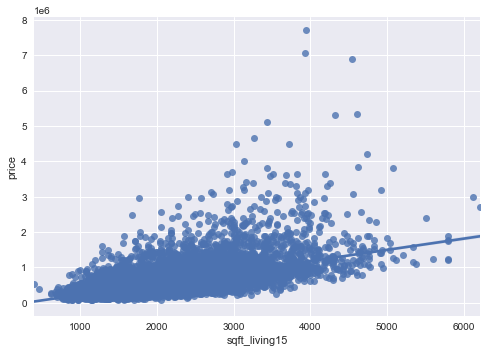

In [1108]:
clean_column('sqft_living15')

regplot('sqft_living15')

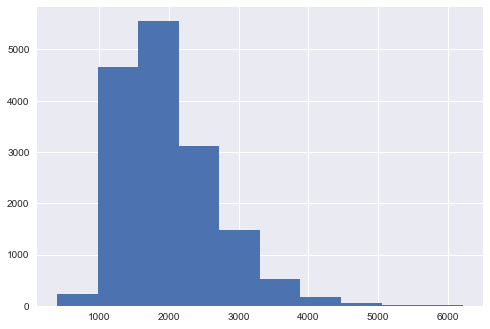

In [1109]:
hist('sqft_living15')

## 'sqft_lot15'

The square footage of the land lots of the nearest 15 neighbors

Datatype: int64
Total unique itms: 7140
Displaying first 10:
[  7639   5000   7503 101930   6819   9711   8113   7570   6000  10208]
Minimum value: 659.  Maximum value: 871200
count    15809.00
mean     12914.69
std      28012.98
min        659.00
25%       5100.00
50%       7620.00
75%      10102.00
max     871200.00
Name: sqft_lot15, dtype: float64


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

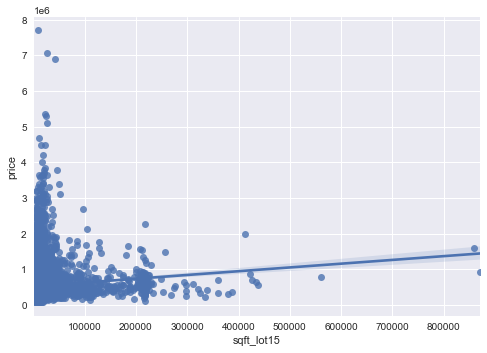

In [1110]:
clean_column('sqft_lot15')

regplot('sqft_lot15')

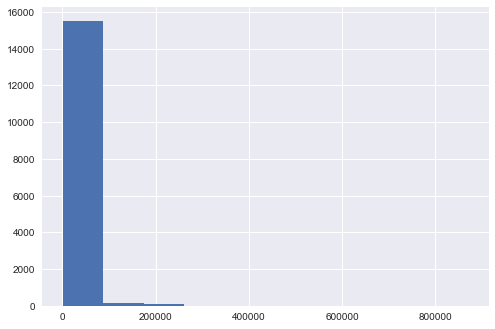

In [1111]:
hist('sqft_lot15')

# EXPLORE

Now that we're comfortable that we have quality data, it's time to determine which columns we'll want to analyze for our primary analysis.

First we'll review which columns we have to work with:

In [1112]:
# df.info()

Based on prior anaysis and scrubbing, we'll categorize our columns into three sections:

Number based
-price
-bedrooms
-bathrooms
-sqft_living
-sqft_lot
-floors
-condition
-grade
-sqft_above
-sqft_basement
-yr_built
-sqft_living15
-sqft_lot15
 
 
Categorical
-waterfront
 
Remove from elementary model
-date
-zipcode 
-lat
-long
-has_basement
-view

We have a mix of integers and floats.  Some features like view, condition, and grade represent a rating system.  Since they tend to ascend to higher value, we do not need to make categories.

We will need to make one categorical variable for waterfront, which is represented as a binary 0 or 1.

For this analysis, we will not analyze zipcode, lat, or long, but zip might be interesting for categorical modeling in future analyses.  Date will not be important since all sales were from 2014-2015, and it doesn't really reflect anything meaningful without a much longer time horizon. 'View' will be removed, since we can't find reliable information on what this represents.  Intuitively, we thought it might represent a star ranking for how good the exterior view is, but the description reads "has been viewed."  This might indicate website or in person traffic and could therefore be helpful for future analysis, but since we do not have a clear cut definition, we will remove.

In [1113]:
df.drop(['date', 'lat', 'long', 'view'],axis=1,inplace=True)

In [1114]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,has_basement,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,renovated
id,,,,,,,,,,,,,,,,,
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,1,400.00,1951,98125,1690,7639,1
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,1,910.00,1965,98136,1360,5000,0
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0,0.00,1987,98074,1800,7503,0
7237550310,1230000.00,4,4.50,5420,101930,1.00,0.00,3,11,3890,1,1530.00,2001,98053,4760,101930,0
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,1715,0,0.00,1995,98003,2238,6819,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.00,3,2.50,1310,1294,2.00,0.00,3,8,1180,1,130.00,2008,98116,1330,1265,0
263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0,0.00,2009,98103,1530,1509,0
6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0,0.00,2014,98146,1830,7200,0


## Multicollinearity

(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

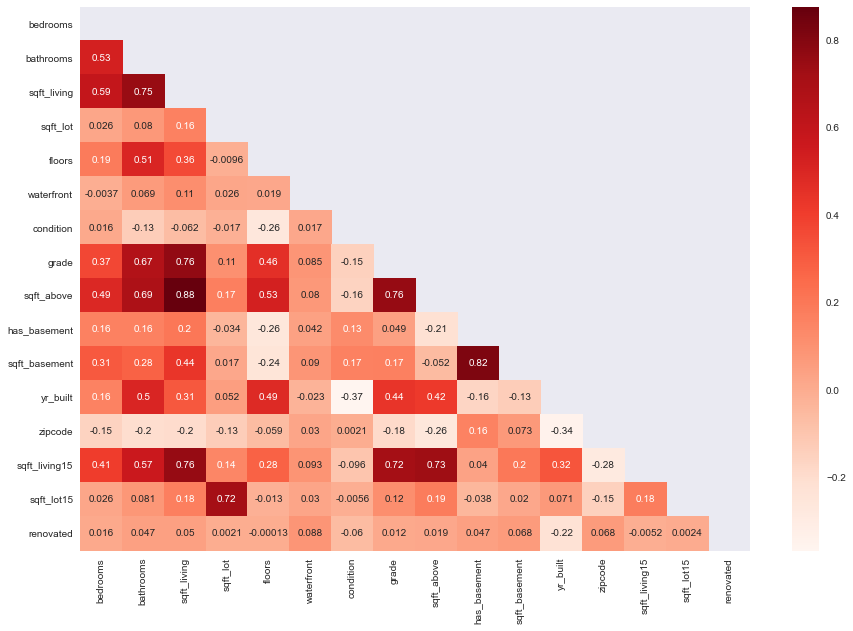

In [1115]:
def heatmap(df_name, figsize=(15,10), cmap='Reds'):
    corr = df_name.drop('price',axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap=cmap, mask=mask)
    return fig, ax

heatmap(df)

drop:

sqft_above + sqft_basement - these are duplicative of sqft_living.

sqft_lot15 and sqft_living15 - these could be more interesting for broader analysis of areas.  Since there is high multicolinearity, we can save these for when we look at zip, lat, and long.

In [1116]:
del df['sqft_above']
del df['sqft_basement']
del df['sqft_lot15']
del df['sqft_living15']

(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

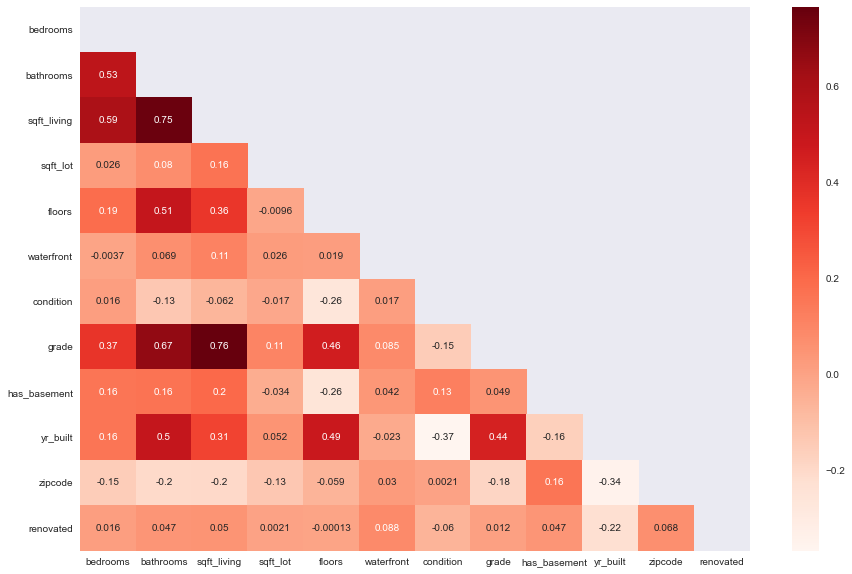

In [1117]:
heatmap(df)

If we're defining multicollinear variables as having a correlation of 0.75 and higher, then our only example is sqft_above and grade at 0.76.  We could surmise that that there is a relationship between larger homes and overall grade given between King County grading system.  However, it seems inappropriate to remove grade, since it seems intuitive that there might be some highly graded smaller homes.  

We are ready to move to the next step.

# One Hot Variables

In [1118]:
categoricals = ['bedrooms', 'bathrooms', 'floors',
       'waterfront', 'condition', 'grade', 'has_basement',
       'renovated']

In [1119]:
# https://nbviewer.jupyter.org/github/examsherpa/King-County-Housing-Price-Prediction/blob/main/housing_modeling.ipynb

dummies = df[]

# df_preprocessed = df.drop(categoricals, axis=1)

# df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

# df_preprocessed.head()

In [1120]:
dummies

,bedrooms,bathrooms,floors,waterfront,condition,grade,has_basement,renovated
id,,,,,,,,
6414100192,3,2.25,2.00,0.00,3,7,1,1
2487200875,4,3.00,1.00,0.00,5,7,1,0
1954400510,3,2.00,1.00,0.00,3,8,0,0
7237550310,4,4.50,1.00,0.00,3,11,1,0
1321400060,3,2.25,2.00,0.00,3,7,0,0
...,...,...,...,...,...,...,...,...
2997800021,3,2.50,2.00,0.00,3,8,1,0
263000018,3,2.50,3.00,0.00,3,8,0,0
6600060120,4,2.50,2.00,0.00,3,8,0,0


# MODEL

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [1032]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,has_basement,yr_built,zipcode,renovated
id,,,,,,,,,,,,,
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1,1951,98125,1
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1,1965,98136,0
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,0,1987,98074,0
7237550310,1230000.00,4,4.50,5420,101930,1.00,0.00,3,11,1,2001,98053,0
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,0,1995,98003,0


In [1033]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats

In [1122]:
def make_model(df_name):

    features = ' + '.join(df_name.drop('price',axis=1).columns)

    f  = "price~"+features

    model = smf.ols(f, df_name).fit()
    display(model.summary())
    return model
    
model(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2457.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:03:04   Log-Likelihood:            -2.1697e+05
No. Observations:               15809   AIC:                         4.340e+05
Df Residuals:                   15796   BIC:                         4.341e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.108e+06   3.69e+06      0.842      0.400   -4.13e+06    1.03e+07
bedrooms     -4.897e+04   2538.992    -19.285      0.000   -5.39e+04    -4.4e+04
bathrooms     5.175e+04   4233.565     12.225      0.000    4.35e+04    6.01e+04
sqft_living    188.5110      3.967     47.519      0.000     180.735     196.287
sqft_lot        -0.2466      0.043     -5.701      0.000      -0.331      -0.162
floors        2.307e+04   4411.189      5.231      0.000    1.44e+04    3.17e+04
waterfront    7.608e+05   2.05e+04     37.133      0.000    7.21e+05    8.01e+05
condition     1.873e+04   3001.262      6.240      0.000    1.28e+04    2.46e+04
grade         1.249e+05   2558.315     48.814      0.000     1.2e+05     1.3e+05
has_basement  7337.7566   4180.315      1.755      0.079    -856.138    1.55e+04
yr_built     -3789.0221     88.836    -42.652      0.000   -3963.150   -3614.894
zipcode         35.7222     37.039      0.964      0.335     -36.879     108.323
renovated     1.937e+04   9429.087      2.054      0.040     887.462    3.79e+04
==============================================================================
Omnibus:                    11990.593   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           866606.579
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      38.755   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1038]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# x_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
#        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']

x_cols = ['bedrooms', 'bathrooms', 'floors',
       'waterfront', 'condition', 'grade', 'has_basement',
       'renovated']

for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()

X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.4293816185820363),
 ('bathrooms', 2.5814469584301754),
 ('floors', 1.7079340913179077),
 ('waterfront', 1.0204999461925006),
 ('condition', 1.0924101795998948),
 ('grade', 1.87903327705075),
 ('has_basement', 1.232531903182788),
 ('renovated', 1.0164638235541268)]

In [555]:
x_cols = ['price', 'sqft_lot', 'waterfront',
       'condition', 'sqft_above', 'sqft_basement']

model(df[x_cols])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4532.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:12:56   Log-Likelihood:            -2.6634e+05
No. Observations:               19221   AIC:                         5.327e+05
Df Residuals:                   19215   BIC:                         5.327e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.942e+05   1.12e+04    -17.404      0.000   -2.16e+05   -1.72e+05
sqft_lot         -0.3376      0.045     -7.442      0.000      -0.426      -0.249
waterfront     8.574e+05   2.11e+04     40.626      0.000    8.16e+05    8.99e+05
condition      4.484e+04   2870.415     15.622      0.000    3.92e+04    5.05e+04
sqft_above      281.4151      2.261    124.483      0.000     276.984     285.846
sqft_basement   271.8445      4.212     64.537      0.000     263.588     280.101
==============================================================================
Omnibus:                    12049.721   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411946.160
Skew:                           2.484   Prob(JB):                         0.00
Kurtosis:                      25.129   Cond. No.                     5.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1039]:
model(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2457.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:57:53   Log-Likelihood:            -2.1697e+05
No. Observations:               15809   AIC:                         4.340e+05
Df Residuals:                   15796   BIC:                         4.341e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.117e+06   3.69e+06      1.115      0.265   -3.12e+06    1.14e+07
bedrooms     -4.422e+04   2292.785    -19.285      0.000   -4.87e+04   -3.97e+04
bathrooms      3.97e+04   3247.832     12.225      0.000    3.33e+04    4.61e+04
sqft_living    188.5110      3.967     47.519      0.000     180.735     196.287
sqft_lot        -0.2466      0.043     -5.701      0.000      -0.331      -0.162
floors        1.244e+04   2378.613      5.231      0.000    7780.021    1.71e+04
waterfront     6.63e+04   1785.577     37.133      0.000    6.28e+04    6.98e+04
condition     1.221e+04   1956.001      6.240      0.000    8371.504     1.6e+04
grade         1.465e+05   3000.448     48.814      0.000    1.41e+05    1.52e+05
has_basement  3584.2068   2041.920      1.755      0.079    -418.190    7586.604
yr_built     -3789.0221     88.836    -42.652      0.000   -3963.150   -3614.894
zipcode         35.7222     37.039      0.964      0.335     -36.879     108.323
renovated     3851.7606   1875.035      2.054      0.040     176.478    7527.044
==============================================================================
Omnibus:                    11990.593   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           866606.579
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      38.755   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1123]:
def make_model(df_name):

    features = ' + '.join(df_name.drop('price',axis=1).columns)

    f  = "price~"+features

    model = smf.ols(f, df_name).fit()
    display(model.summary())
    return model
    
model1 = make_model(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2457.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:06:14   Log-Likelihood:            -2.1697e+05
No. Observations:               15809   AIC:                         4.340e+05
Df Residuals:                   15796   BIC:                         4.341e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.108e+06   3.69e+06      0.842      0.400   -4.13e+06    1.03e+07
bedrooms     -4.897e+04   2538.992    -19.285      0.000   -5.39e+04    -4.4e+04
bathrooms     5.175e+04   4233.565     12.225      0.000    4.35e+04    6.01e+04
sqft_living    188.5110      3.967     47.519      0.000     180.735     196.287
sqft_lot        -0.2466      0.043     -5.701      0.000      -0.331      -0.162
floors        2.307e+04   4411.189      5.231      0.000    1.44e+04    3.17e+04
waterfront    7.608e+05   2.05e+04     37.133      0.000    7.21e+05    8.01e+05
condition     1.873e+04   3001.262      6.240      0.000    1.28e+04    2.46e+04
grade         1.249e+05   2558.315     48.814      0.000     1.2e+05     1.3e+05
has_basement  7337.7566   4180.315      1.755      0.079    -856.138    1.55e+04
yr_built     -3789.0221     88.836    -42.652      0.000   -3963.150   -3614.894
zipcode         35.7222     37.039      0.964      0.335     -36.879     108.323
renovated     1.937e+04   9429.087      2.054      0.040     887.462    3.79e+04
==============================================================================
Omnibus:                    11990.593   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           866606.579
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      38.755   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1127]:
model1.pvalues

pvals = model1.pvalues

pvals[pvals > 0.05]

Intercept      0.40
has_basement   0.08
zipcode        0.33
dtype: float64

In [1128]:
model1.pvalues

pvals = model1.pvalues

pvals[pvals > 0.05].index

Index(['Intercept', 'has_basement', 'zipcode'], dtype='object')

In [ ]:
#if majority of zipcodes are not significant, drop whole column and vice versa.

In [1132]:
features = ' + '.join(df.drop('price',axis=1).columns)
features = features.replace("zipcode", "C(zipcode)")
features

'bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + condition + grade + has_basement + yr_built + C(zipcode) + renovated'

In [1133]:
f  = "price~"+features

model = smf.ols(f, df).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     777.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:15:03   Log-Likelihood:            -2.1264e+05
No. Observations:               15809   AIC:                         4.254e+05
Df Residuals:                   15728   BIC:                         4.261e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.343e+06   1.54e+05      8.701      0.000    1.04e+06    1.65e+06
C(zipcode)[T.98002]  2.654e+04   1.74e+04      1.528      0.127   -7517.261    6.06e+04
C(zipcode)[T.98003] -1.561e+04   1.55e+04     -1.004      0.315   -4.61e+04    1.49e+04
C(zipcode)[T.98004]   7.58e+05   1.55e+04     49.028      0.000    7.28e+05    7.88e+05
C(zipcode)[T.98005]  2.783e+05   1.83e+04     15.179      0.000    2.42e+05    3.14e+05
C(zipcode)[T.98006]  2.686e+05    1.4e+04     19.230      0.000    2.41e+05    2.96e+05
C(zipcode)[T.98007]  2.285e+05   1.98e+04     11.517      0.000     1.9e+05    2.67e+05
C(zipcode)[T.98008]  2.532e+05   1.57e+04     16.170      0.000    2.23e+05    2.84e+05
C(zipcode)[T.98010]  5.523e+04   2.28e+04      2.423      0.015    1.06e+04    9.99e+04
C(zipcode)[T.98011]  1.119e+05   1.77e+04      6.320      0.000    7.72e+04    1.47e+05
C(zipcode)[T.98014]  8.694e+04   2.07e+04      4.203      0.000    4.64e+04    1.27e+05
C(zipcode)[T.98019]   6.99e+04   1.83e+04      3.825      0.000    3.41e+04    1.06e+05
C(zipcode)[T.98022]  8260.9355   1.68e+04      0.492      0.622   -2.46e+04    4.11e+04
C(zipcode)[T.98023] -3.192e+04   1.37e+04     -2.330      0.020   -5.88e+04   -5066.866
C(zipcode)[T.98024]  1.381e+05   2.45e+04      5.640      0.000    9.01e+04    1.86e+05
C(zipcode)[T.98027]  1.553e+05   1.43e+04     10.841      0.000    1.27e+05    1.83e+05
C(zipcode)[T.98028]  1.144e+05   1.56e+04      7.316      0.000    8.38e+04    1.45e+05
C(zipcode)[T.98029]  1.927e+05   1.51e+04     12.759      0.000    1.63e+05    2.22e+05
C(zipcode)[T.98030] -5524.5452   1.62e+04     -0.341      0.733   -3.73e+04    2.63e+04
C(zipcode)[T.98031]  8592.9283   1.58e+04      0.543      0.587   -2.24e+04    3.96e+04
C(zipcode)[T.98032]  5958.7946   1.99e+04      0.300      0.764    -3.3e+04    4.49e+04
C(zipcode)[T.98033]  3.594e+05   1.42e+04     25.303      0.000    3.32e+05    3.87e+05
C(zipcode)[T.98034]  2.075e+05   1.35e+04     15.353      0.000    1.81e+05    2.34e+05
C(zipcode)[T.98038]  2.798e+04   1.33e+04      2.108      0.035    1957.854     5.4e+04
C(zipcode)[T.98039]  1.309e+06   3.03e+04     43.252      0.000    1.25e+06    1.37e+06
C(zipcode)[T.98040]  5.127e+05    1.6e+04     31.978      0.000    4.81e+05    5.44e+05
C(zipcode)[T.98042] -1277.3737   1.34e+04     -0.095      0.924   -2.76e+04     2.5e+04
C(zipcode)[T.98045]  9.715e+04   1.69e+04      5.733      0.000    6.39e+04     1.3e+05
C(zipcode)[T.98052]  2.196e+05   1.34e+04     16.351      0.000    1.93e+05    2.46e+05
C(zipcode)[T.98053]   1.77e+05   1.45e+04     12.211      0.000    1.49e+05    2.05e+05
C(zipcode)[T.98055]  4.495e+04   1.59e+04      2.822      0.005    1.37e+04    7.62e+04
C(zipcode)[T.98056]  9.539e+04   1.43e+04      6.683      0.000    6.74e+04    1.23e+05
C(z

# adding QQ plot

In [ ]:
def make_model(df_name):

    features = ' + '.join(df_name.drop('price',axis=1).columns)

    f  = "price~"+features

    model = smf.ols(f, df_name).fit()
    display(model.summary())
    return model
    
model1 = make_model(df)

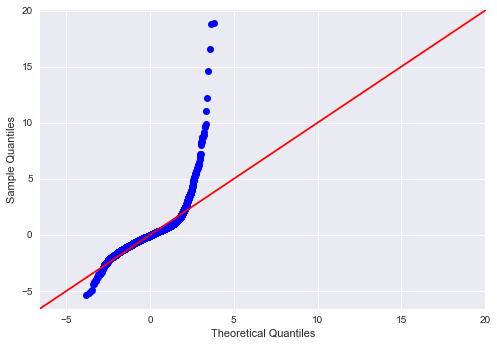

In [1137]:
sm.graphics.qqplot(model1.resid, stats.norm, fit=True, line="45");

In [ ]:
#python remove outliers, z score and iqr method.  we might use IQR.  check price first.

In [ ]:
#p values - scale all values before running model.  multivariate - Feature Scaling and Normalization

In [ ]:
#all values before standardizing or scaling or whatever are actually in dollars

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

# Scratch

## Log transform

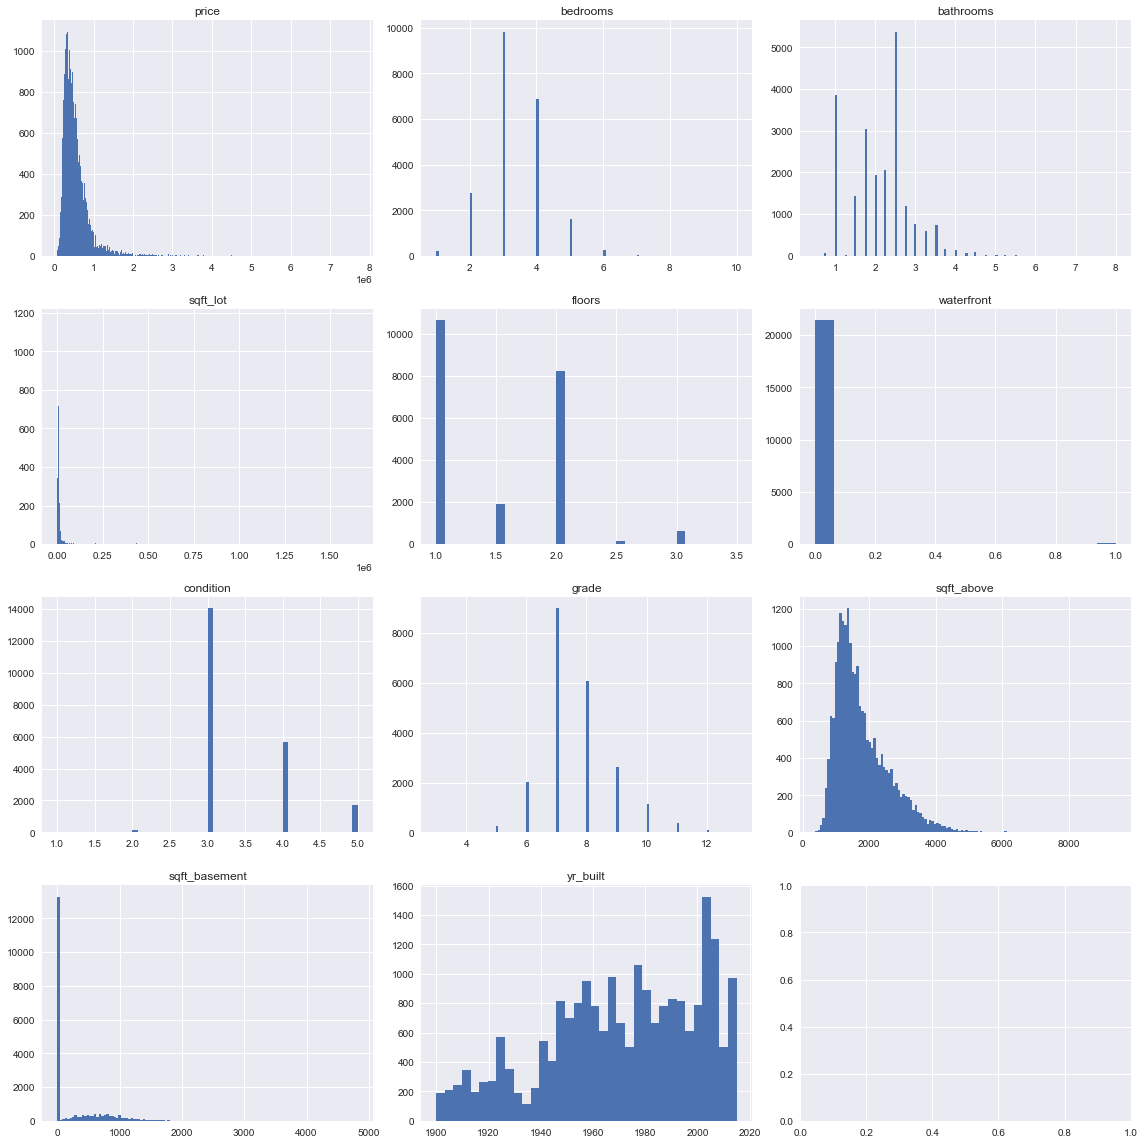

In [182]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=(df.shape[1] // 3 + 1), ncols=3, figsize=(16,16))

categoricals = [column for column in df.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [175]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built'],
      dtype='object')

remove waterfront, sqft_basement

In [184]:
df_log = df.copy()

df_log.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built
id,,,,,,,,,,,
7129300520,221900.00,3,1.00,5650,1.00,0,3,7,1180,0.00,1955
6414100192,538000.00,3,2.25,7242,2.00,0,3,7,2170,400.00,1951
5631500400,180000.00,2,1.00,10000,1.00,0,3,6,770,0.00,1933
2487200875,604000.00,4,3.00,5000,1.00,0,5,7,1050,910.00,1965
1954400510,510000.00,3,2.00,8080,1.00,0,3,8,1680,0.00,1987


In [186]:
log_list = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
    'condition', 'grade', 'sqft_above', 'yr_built']

# waterfront nad sqft_basement removed

In [188]:
df_log = pd.DataFrame([])

for column in log_list:
    df_log[column] = np.log(df[column])
    
df_log.head()
    

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built
id,,,,,,,,,
7129300520,12.31,1.10,0.00,8.64,0.00,1.10,1.95,7.07,7.58
6414100192,13.20,1.10,0.81,8.89,0.69,1.10,1.95,7.68,7.58
5631500400,12.10,0.69,0.00,9.21,0.00,1.10,1.79,6.65,7.57
2487200875,13.31,1.39,1.10,8.52,0.00,1.61,1.95,6.96,7.58
1954400510,13.14,1.10,0.69,9.00,0.00,1.10,2.08,7.43,7.59


In [195]:
features = ' + '.join(df_log.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4156.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:51:09   Log-Likelihood:                -6725.0
No. Observations:               21597   AIC:                         1.347e+04
Df Residuals:                   21588   BIC:                         1.354e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.0014      1.482     74.233      0.000     107.097     112.906
bedrooms      -0.0833      0.010     -8.130      0.000      -0.103      -0.063
bathrooms      0.2943      0.009     31.644      0.000       0.276       0.312
sqft_lot      -0.0245      0.003     -7.937      0.000      -0.031      -0.018
floors        -0.0003      0.010     -0.030      0.976      -0.019       0.018
condition      0.1365      0.013     10.156      0.000       0.110       0.163
grade          2.1395      0.024     89.980      0.000       2.093       2.186
sqft_above     0.2543      0.011     23.493      0.000       0.233       0.276
yr_built     -13.6052      0.196    -69.579      0.000     -13.988     -13.222
==============================================================================
Omnibus:                      183.559   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.802
Skew:                           0.067   Prob(JB):                     1.06e-61
Kurtosis:                       3.542   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
df_test = df.drop(['waterfront', 'sqft_basement'], axis=1)

features = ' + '.join(df_test.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     3821.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:44   Log-Likelihood:            -2.9786e+05
No. Observations:               21597   AIC:                         5.957e+05
Df Residuals:                   21588   BIC:                         5.958e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.012e+06   1.39e+05     57.526      0.000    7.74e+06    8.29e+06
bedrooms   -2.829e+04   2223.286    -12.726      0.000   -3.27e+04   -2.39e+04
bathrooms     1.2e+05   3423.275     35.051      0.000    1.13e+05    1.27e+05
sqft_lot      -0.1608      0.040     -4.023      0.000      -0.239      -0.082
floors     -2.752e+04   3855.794     -7.137      0.000   -3.51e+04      -2e+04
condition    2.42e+04   2691.502      8.991      0.000    1.89e+04    2.95e+04
grade       1.633e+05   2230.767     73.196      0.000    1.59e+05    1.68e+05
sqft_above   115.9552      3.477     33.350      0.000     109.140     122.770
yr_built   -4630.8434     70.936    -65.282      0.000   -4769.883   -4491.803
==============================================================================
Omnibus:                    18447.974   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1566139.504
Skew:                           3.657   Prob(JB):                         0.00
Kurtosis:                      44.072   Cond. No.                     3.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
df_log.concat(df.drop(log_list, axis=1), axis=1)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [202]:
pd.concat(df_log, df)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"